# Named Entity Recognition Model

#### This is the Training model of Sports NER
#### First, we use python to implement Part-of-speech tagging automatically. We selected 4000 data by our API to train this model. Then, use spaCy's update() method to train the model. Finally, test and save the model.


In [1]:
import pandas as pd
import emoji
df= pd.read_csv('../dataset/olypmilc sport names.csv')
names = df['Sport'].unique()

train_data = []
training_sentences = pd.read_csv("../dataset/train_bigset_pure.csv", header=None)
training_sentences = training_sentences[0]
#Transform the emoji to the text
training_sentences = training_sentences.apply(lambda x: emoji.demojize(x))

#Get the entity list for training
for sentence in training_sentences:
    entity_list = []
    sentence_tuple = (sentence, {'entities': entity_list})

    for name in names:
        if name.lower() in sentence.lower():
            sidx = sentence.lower().index(name.lower())
            entity_list.append((sidx, sidx + len(name), 'SPORT'))

    if entity_list:
        entity_list.sort(key=lambda x:x[1])
        if len(entity_list) > 1:
            remove_list = []
            for i in range(1, len(entity_list)):
                if entity_list[i][0] < entity_list[i - 1][1]:
                    if entity_list[i][1] > entity_list[i - 1][1]:
                        remove_list.append(entity_list[i - 1])
                    else:
                        remove_list.append(entity_list[i])
            for remove_data in remove_list:
                entity_list.remove(remove_data)  #   remove the overlapped entities

        print(entity_list)
        train_data.append(sentence_tuple)

[(33, 45, 'SPORT')]
[(7, 15, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(77, 81, 'SPORT')]
[(8, 12, 'SPORT')]
[(7, 15, 'SPORT')]
[(7, 15, 'SPORT')]
[(7, 15, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(154, 158, 'SPORT')]
[(10, 20, 'SPORT')]
[(41, 50, 'SPORT')]
[(75, 83, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(35, 41, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(92, 100, 'SPORT')]
[(106, 114, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(19, 23, 'SPORT')]
[(79, 87, 'SPORT')]
[(67, 73, 'SPORT')]
[(79, 87, 'SPORT')]
[(47, 53, 'SPORT')]
[(62, 70, 'SPORT')]
[(90, 94, 'SPORT')]
[(111, 117, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(108, 112, 'SPORT')]
[(84, 88, 'SPORT')]
[(38, 51, 'SPORT')]
[(111, 117, 'SPORT')]
[(111, 117, 'SPORT')]
[(35, 43, 'SPOR

[(9, 15, 'SPORT')]
[(90, 99, 'SPORT')]
[(96, 105, 'SPORT')]
[(81, 89, 'SPORT')]
[(28, 37, 'SPORT'), (82, 86, 'SPORT')]
[(8, 12, 'SPORT')]
[(90, 99, 'SPORT')]
[(90, 99, 'SPORT')]
[(101, 110, 'SPORT')]
[(90, 99, 'SPORT')]
[(75, 84, 'SPORT')]
[(44, 51, 'SPORT')]
[(8, 12, 'SPORT')]
[(8, 12, 'SPORT')]
[(60, 66, 'SPORT')]
[(26, 32, 'SPORT')]
[(7, 13, 'SPORT')]
[(40, 46, 'SPORT')]
[(1, 11, 'SPORT')]
[(72, 85, 'SPORT')]
[(8, 12, 'SPORT')]
[(101, 110, 'SPORT')]
[(101, 110, 'SPORT')]
[(29, 37, 'SPORT')]
[(101, 110, 'SPORT')]
[(101, 110, 'SPORT')]
[(101, 110, 'SPORT')]
[(85, 94, 'SPORT')]
[(10, 18, 'SPORT')]
[(10, 19, 'SPORT'), (64, 68, 'SPORT')]
[(67, 75, 'SPORT')]
[(10, 16, 'SPORT')]
[(106, 112, 'SPORT')]
[(10, 16, 'SPORT')]
[(10, 16, 'SPORT')]
[(0, 6, 'SPORT')]
[(22, 34, 'SPORT')]
[(27, 34, 'SPORT')]
[(59, 63, 'SPORT')]
[(95, 99, 'SPORT')]
[(0, 6, 'SPORT')]
[(99, 105, 'SPORT')]
[(90, 96, 'SPORT')]
[(7, 15, 'SPORT')]
[(9, 22, 'SPORT')]
[(99, 107, 'SPORT')]
[(88, 98, 'SPORT'), (166, 174, 'SPORT'

In [ ]:
!pip install plac

In [ ]:
from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy
from spacy.training import Example
import warnings
warnings.filterwarnings('ignore')



#set up the model
model=("Model name. Defaults to blank 'en' model.", "option", "m", str)
output_dir=('../NER')
n_iter=("Number of training iterations", "option", "n", int)

#define the model
def model_ner(model=None, output_dir=output_dir, n_iter=200):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.add_pipe('ner')
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe('ner')

    # add labels
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for _ in range(n_iter):
            random.shuffle(train_data)
            losses = {}
            for text, annotations in train_data:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotations)
                nlp.update(
                    [example],
                    drop=0.5,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print(losses)
            

    # test the trained model
    for text, _ in train_data:
        doc = nlp(text)
        print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
        print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])
        

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        for text, _ in train_data:
            doc = nlp2(text)
            print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
            print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])
        
model_ner()

### The model training takes a very long time, so the short cut of the loss of NER model is following:

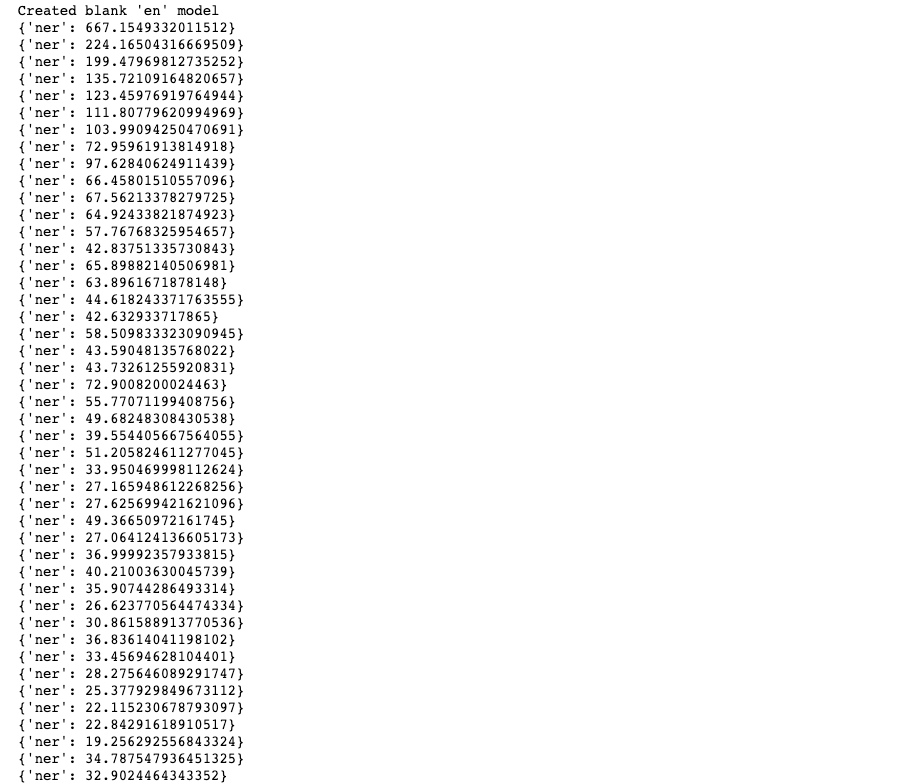
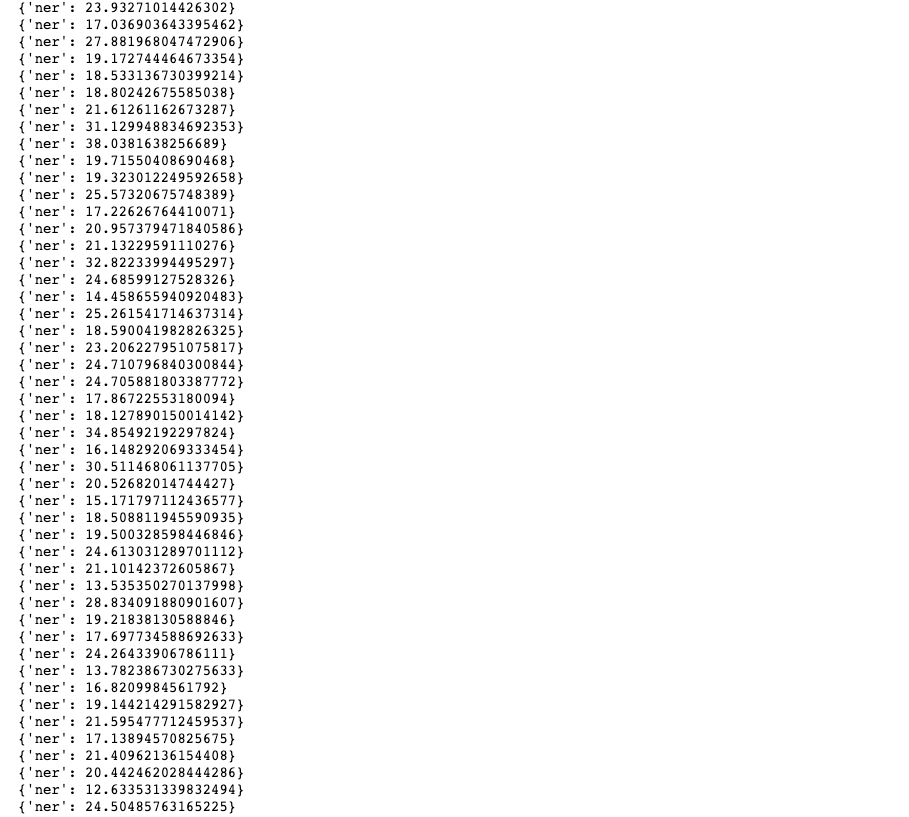
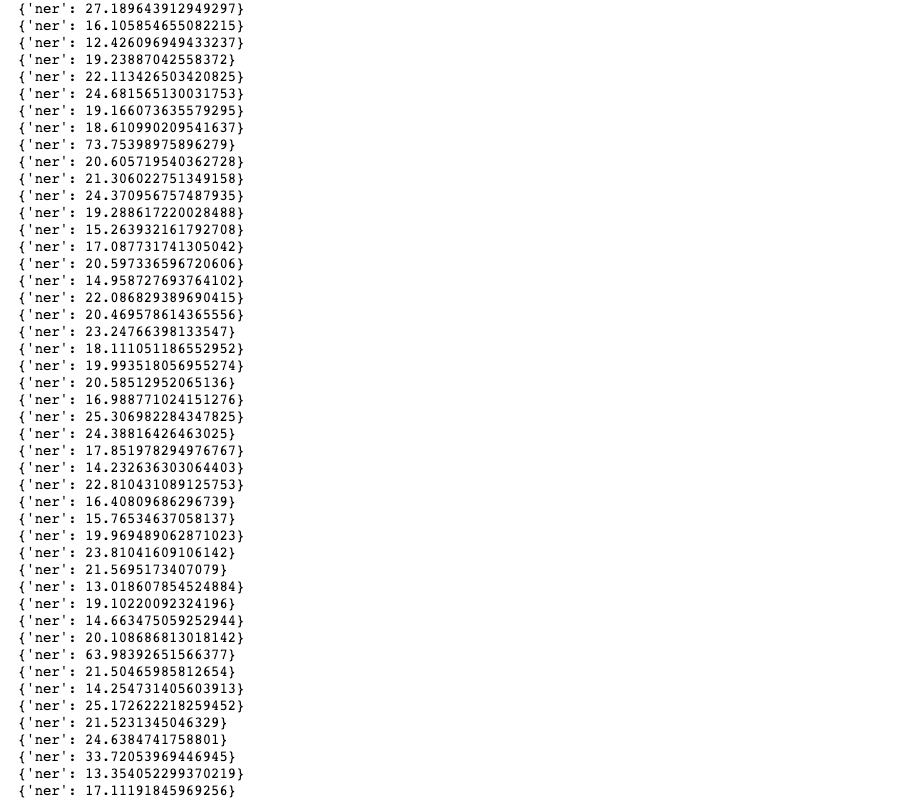
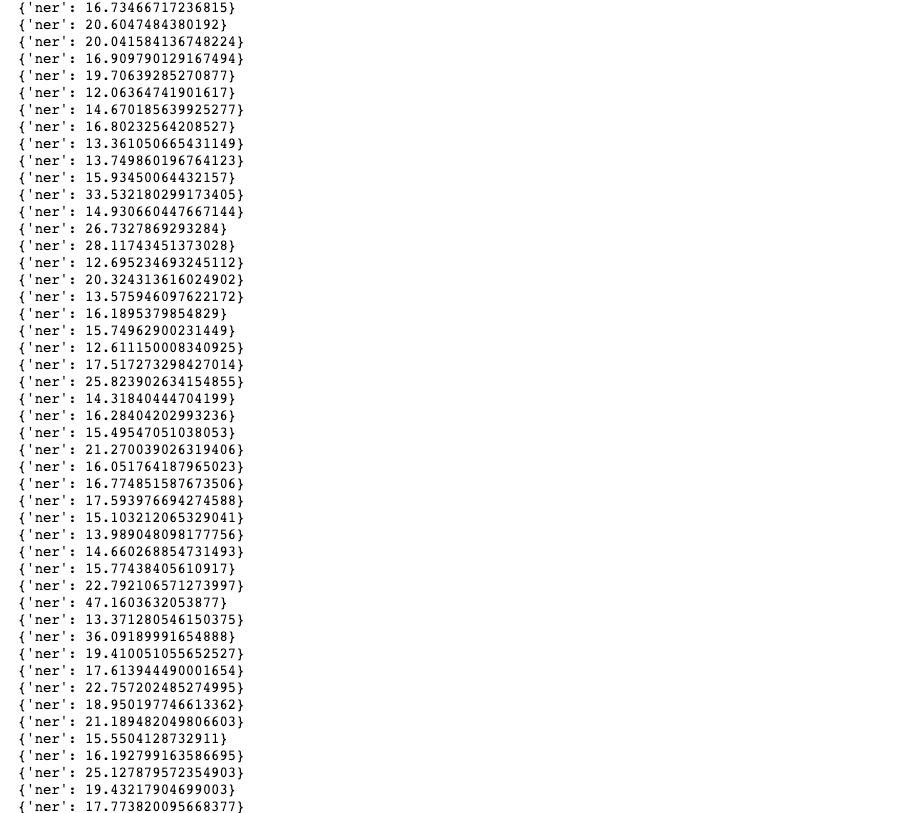
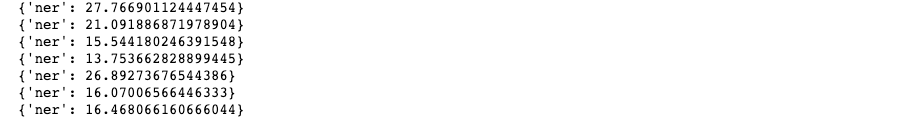